### Load & preprocess data playground

In [378]:
import os
import yaml
import xarray as xr
import matplotlib.pyplot as plt
from subprocess import call

In [349]:
ROOT_DIR = os.getcwd() + '/..'
try:
    with open (ROOT_DIR + '/configuration.yml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')

In [350]:
raw_cams_dir = ROOT_DIR + '/' + config['raw']['cams']
cities_info = ROOT_DIR + '/' + config['cities']

In [352]:
cities = pd.read_csv(cities_info)
cities.head()

,city,latitude,longitude
0,ALE,82.492,-62.508
1,ABZ,12.990,50.570
2,ASP,58.800,17.380
3,BOT,-25.500,25.800
4,BSL,53.000,7.950


In [392]:
i = 11
city = cities['city'][i]
lat = cities['latitude'][i]
long = cities['longitude'][i]
if long < 0: long = long + 360

In [410]:
files = os.listdir(raw_cams_dir + '/' + city)
files = [f for f in files if '.idx' not in f]
#files
['cat'] + files + ['>', 'outfile']

['cat',
 'cams-reanalysis_daily_201004.grb',
 'cams-reanalysis_daily_201002.grb',
 'cams-reanalysis_daily_201007.grb',
 'cams-reanalysis_daily_201005.grb',
 'cams-reanalysis_daily_201106.grb',
 'cams-reanalysis_daily_201111.grb',
 'cams-reanalysis_daily_201003.grb',
 'cams-reanalysis_daily_201103.grb',
 'cams-reanalysis_daily_201006.grb',
 'cams-reanalysis_daily_201110.grb',
 'cams-reanalysis_daily_201112.grb',
 'cams-reanalysis_daily_201102.grb',
 'cams-reanalysis_daily_201107.grb',
 'cams-reanalysis_daily_201001.grb',
 'cams-reanalysis_daily_201105.grb',
 'cams-reanalysis_daily_201009.grb',
 'cams-reanalysis_daily_201011.grb',
 'cams-reanalysis_daily_201010.grb',
 'cams-reanalysis_daily_201101.grb',
 'cams-reanalysis_daily_201104.grb',
 'cams-reanalysis_daily_201008.grb',
 'cams-reanalysis_daily_201109.grb',
 'cams-reanalysis_daily_201012.grb',
 'cams-reanalysis_daily_201108.grb',
 '>',
 'outfile']

In [400]:
filename = str(os.listdir(raw_cams_dir + '/' + city)[0])

In [401]:
ds = xr.open_dataset(raw_cams_dir + '/' + city + '/' + filename, engine='cfgrib')

In [403]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 2, longitude: 2, time: 120)
Coordinates:
  * time        (time) datetime64[ns] 2010-04-01 ... 2010-04-30T18:00:00
    step        timedelta64[ns] ...
    hybrid      int64 ...
  * latitude    (latitude) float64 -22.6 -23.6
  * longitude   (longitude) float64 313.4 314.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    t           (time, latitude, longitude) float32 ...
    co          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-02-22T10:58:16 GRIB to CDM+CF via cfgrib-0....

In [366]:
df = ds.loc[dict(latitude=lat, longitude=long)].to_dataframe()
df.head()

,step,hybrid,latitude,longitude,valid_time,t,co
time,,,,,,,
2012-11-01 00:00:00,0 days,60,82.492,297.492,2012-11-01 00:00:00,249.214890,1.128494e-07
2012-11-01 06:00:00,0 days,60,82.492,297.492,2012-11-01 06:00:00,248.902817,1.131068e-07
2012-11-01 12:00:00,0 days,60,82.492,297.492,2012-11-01 12:00:00,249.146255,1.116957e-07
2012-11-01 18:00:00,0 days,60,82.492,297.492,2012-11-01 18:00:00,247.809570,1.106799e-07
2012-11-02 00:00:00,0 days,60,82.492,297.492,2012-11-02 00:00:00,248.551910,1.104830e-07


In [367]:
df = df.groupby(df.index.date).mean()
df.head()

,hybrid,latitude,longitude,t,co
2012-11-01,60,82.492,297.492,248.768387,1.120830e-07
2012-11-02,60,82.492,297.492,248.892487,1.101667e-07
2012-11-03,60,82.492,297.492,248.603485,1.082050e-07
2012-11-04,60,82.492,297.492,250.212570,1.081665e-07
2012-11-05,60,82.492,297.492,250.098541,1.068746e-07


In [369]:
df = df.drop(columns=['hybrid', 'latitude', 'longitude'])

In [370]:
df.index.name = 'date'

In [371]:
df.head()

,t,co
date,,
2012-11-01,248.768387,1.120830e-07
2012-11-02,248.892487,1.101667e-07
2012-11-03,248.603485,1.082050e-07
2012-11-04,250.212570,1.081665e-07
2012-11-05,250.098541,1.068746e-07


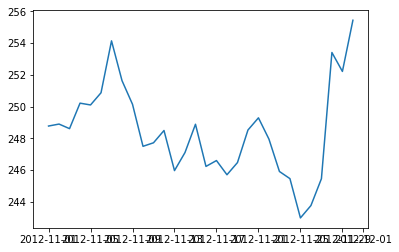

In [373]:
plt.plot(df['t'])

In [379]:
call(['rm', raw_cams_dir + '/' + city + '/', '*.idx'])

1

In [381]:
import pandas as pd

In [382]:
info = []
with open('../raw/n100/Measurementsites_info.txt', 'r') as f:
    for line in f:
        if '%' in line:
            continue
        line = line.split()[:4]
        info.append(dict(city=line[3], laitude=line[0], longitude=line[1]))
pd.DataFrame(info).head()

,city,laitude,longitude
0,ALE,"82.492,","-62.508,"
1,ABZ,"12.99,","50.57,"
2,ASP,"58.80,","17.38,"
3,BOT,"-25.5,","25.8,"
4,BSL,"53.00,","7.95,"


In [383]:
df = pd.read_csv('../data/n100' + '/' + 'HYY' + '_N100.csv')

In [384]:
print(min(df['date'])[:4])
print(max(df['date'])[:4])

2003
2019
